In [4]:
%run notebook.config.ipy

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
set database db: ../csvdb
set database anndb: /gfs/mirror/annotations/mm10_ensembl78/csvdb
set database ipydb: csvdb


*Retrieve QC statistics from the database*

In [20]:
statement = '''select * from qc_summary'''

df = DB.fetch_DataFrame(statement,db)

id_columns = ["cell"] + PARAMS["name_field_titles"].split(",")

data = pd.melt(df,id_vars=id_columns)
#data.head()

*Histograms of post-mapping QC metrics*

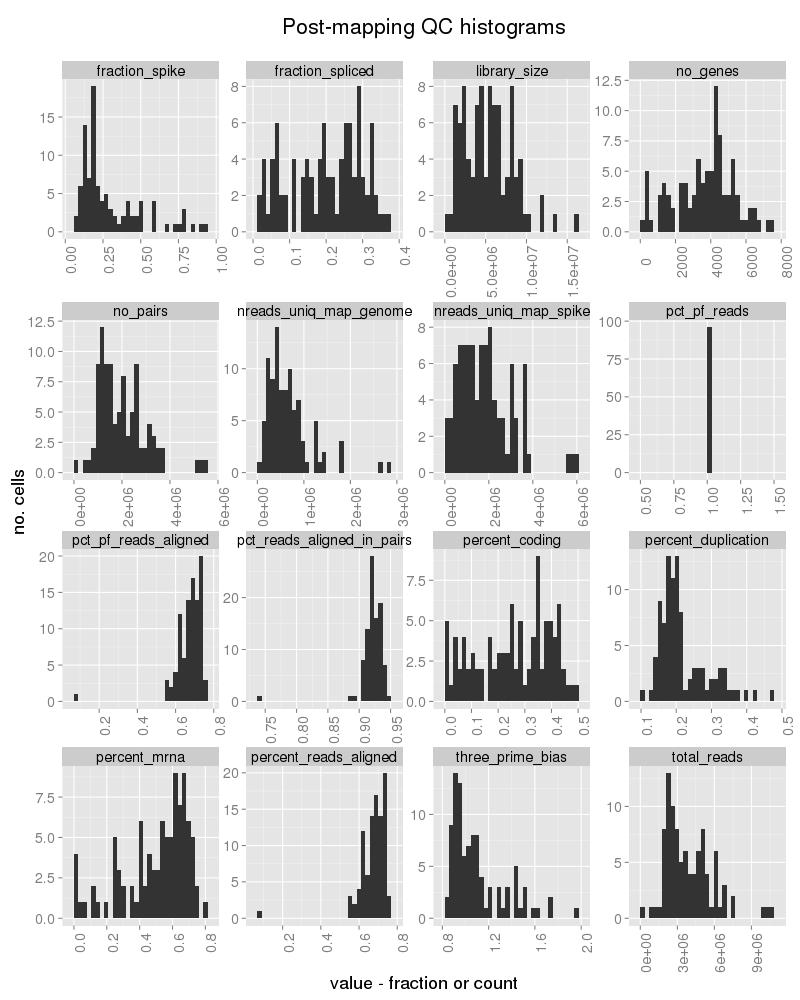

In [21]:
%%R -i data -w 800 -h 1000

gp <- ggplot(data, aes(x=value))
gp <- gp + facet_wrap(~variable, scales="free")
gp <- gp + geom_histogram(nbin=200)
gp <- gp + theme(axis.text.x=element_text(angle=90))
gp <- gp + ggtitle("Post-mapping QC histograms\n")
gp <- gp + ylab("no. cells") + xlab("value - fraction or count")

suppressMessages(print(gp))
#ggsave("post_mapping_qc.pdf", gp, device=cairo_pdf)

*Overview heatmap of post-mapping QC metrics*

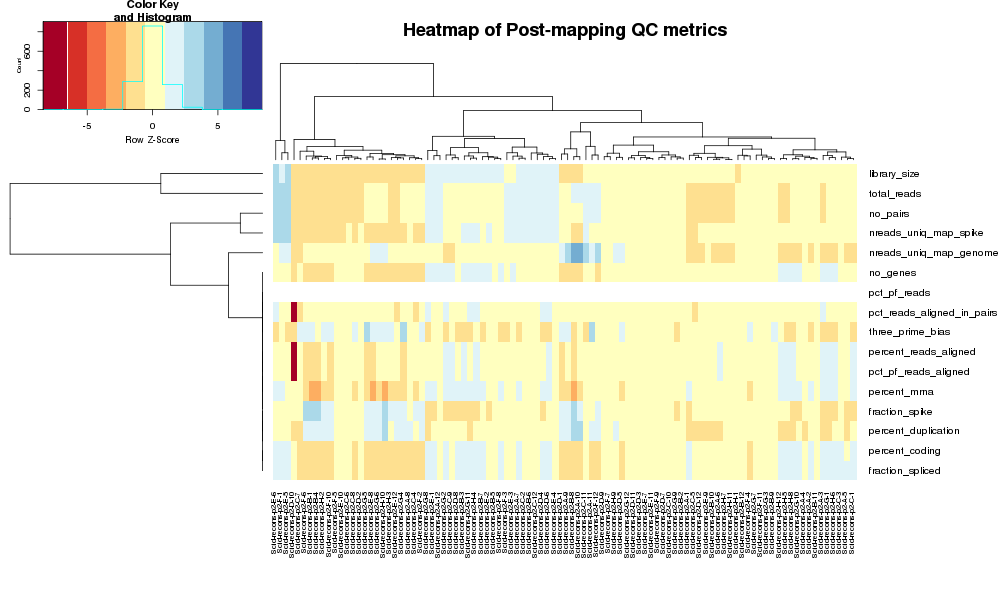

In [47]:
%%R -i id_columns -i df -w1000 -h600
mat <- as.matrix(df[,!colnames(df) %in% id_columns])
rownames(mat) <- df$cell
require(RColorBrewer)
pal = brewer.pal(100,"RdYlBu")
heatmap.2(t(mat), trace="none",scale="row",col=pal, mar=c(10,12), main="Heatmap of Post-mapping QC metrics")